#**CAM Projeto 2**

##**Classificação do conjunto de dados do grupo HLS utilizando algoritmo de Floresta Aleatória (Random Forest)**

###**1) Importando bibliotecas e dados**

In [1]:
# Universidade de Brasília - Programa de Pós-Graduação em Sistemas Mecatrônicos (PPMEC)
# Disciplina: Cibernética e Aprendizagem de Máquina
# Período: 1/2020
# Professor: Díbio Leandro Borges
# Aluno: Alceu Bernardes Castanheira de Farias 
# Matrícula : 19/0144670
#
# O projeto visa avaliar a possibilidade de diagnóstico Covid-19, não Covid-19 e pneumonias através de
# exames de sangue rotineiros. Essa classificação diagnóstico deve ser feita com o algoritmo de
# “Random Forest”. Os resultados devem estabelecer além de acurácia um ordenamento sobre quais
# variáveis de exames seriam mais relevantes.
#
# Este notebook implementa algoritmos de floresta aleatória (Random Forest) para executar a tarefa de
# classificação proposta acima, com base nos dados obtidos no notebook 'CAM_Projeto_2_HSL_EDA.ipynb'.
#
# Importando bibliotecas:
#
# Pandas : importar dados do arquivo .csv e manipular dados nos dataframes
# Numpy : realizar operações aritméticas e controlar o estado aleatório dos 
#         estimadores dos algoritmos de classificação
# Matlplotlib : Geração de gráficos
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit Learn: biblioteca com vários algoritmos de aprendizagem de máquina implementados
# 
# Train_test_split : dividir os dados em conjuntos de treino e de teste
# RandomForestClassifier: algoritmo de classificação de floresta aleatória (RandomForest), 
# Accuracy_score : métrica de acurácia para analisar o desempenho do algoritmo
#
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importando os dados do arquivo 'HSL_EDA.csv' provenientes do notebook 'CAM_Projeto_2_HSL_EDA.ipynb'
# com o Pandas. O caracter de separação é '|'.
dados = pd.read_csv('HSL_EDA.csv',sep='|')
dados.head(5)

,ID_PACIENTE,IC_SEXO,IC_IDADE,DT_COLETA,DE_RESULTADO,DE_LEUCOCITOS,DE_HEMOGLOBINA,DE_PLAQUETAS,DE_NEUTROFILOS (%),DE_NEUTROFILOS,DE_LINFOCITOS (%),DE_LINFOCITOS,DE_PROTEINA_C_REATIVA,DE_BILIRRUBINA,DE_UREIA,DE_CREATININA,DE_DHL,DE_DIMEROS_D
0,3487791F44C34B421C932DC8616A8437,0.0,57.0,2020-05-25,1.0,6790.179153,13.257818,200627.035831,65.892508,4723.029316,22.709446,1364.429967,4.038129,0.437611,40.516522,1.159225,505.25731,1437.374194
1,3487791F44C34B421C932DC8616A8437,0.0,57.0,2020-05-04,1.0,3390.000000,14.800000,86000.000000,62.800000,2130.000000,14.500000,490.000000,0.190000,0.437611,28.000000,0.910000,364.00000,248.000000
2,F5B5BD59D98836D8AA2D8C27B01225AB,0.0,75.0,2020-06-07,1.0,14610.000000,11.800000,190000.000000,86.400000,12620.000000,7.500000,1100.000000,0.290000,0.620000,103.000000,1.000000,505.25731,1240.248775
3,F5B5BD59D98836D8AA2D8C27B01225AB,0.0,75.0,2020-05-21,1.0,5000.000000,12.800000,202000.000000,93.600000,4680.000000,5.600000,280.000000,30.670000,0.437611,58.000000,1.290000,505.25731,996.000000
4,C3A3D083DBC1353FAB5F87282EE86633,1.0,32.0,2020-07-23,0.0,6690.000000,13.800000,203000.000000,74.800000,5010.000000,18.100000,1210.000000,0.970000,0.660000,28.000000,0.680000,505.25731,1437.374194


In [3]:
# Exibindo as informações do dataframe. Como os dados foram tratados previamente, não temos entradas nulas e 
# todos os dados que serão utilizados pelo algoritmo de classificação já convertidos de 'object' para tipos
# numéricos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_PACIENTE            2134 non-null   object 
 1   IC_SEXO                2134 non-null   float64
 2   IC_IDADE               2134 non-null   float64
 3   DT_COLETA              2134 non-null   object 
 4   DE_RESULTADO           2134 non-null   float64
 5   DE_LEUCOCITOS          2134 non-null   float64
 6   DE_HEMOGLOBINA         2134 non-null   float64
 7   DE_PLAQUETAS           2134 non-null   float64
 8   DE_NEUTROFILOS (%)     2134 non-null   float64
 9   DE_NEUTROFILOS         2134 non-null   float64
 10  DE_LINFOCITOS (%)      2134 non-null   float64
 11  DE_LINFOCITOS          2134 non-null   float64
 12  DE_PROTEINA_C_REATIVA  2134 non-null   float64
 13  DE_BILIRRUBINA         2134 non-null   float64
 14  DE_UREIA               2134 non-null   float64
 15  DE_C

###**2) Separando conjuntos de treino e de teste**

In [4]:
# Separando os dados em x e y: 
#
# x = features a serem analisadas. 
# y = o resultado da classificação.
#
# x = - "IC_SEXO", 
#     - "IC_IDADE"	
#     - "DE_LEUCOCITOS" 
#     - "DE_HEMOGLOBINA"	
#     - "DE_PLAQUETAS"	
#     - "DE_NEUTROFILOS (%)"	
#     - "DE_NEUTROFILOS"	
#     - "DE_LINFOCITOS (%)"	
#     - "DE_LINFOCITOS"
#     - "DE_PROTEINA_C_REATIVA"	
#     - "DE_BILIRRUBINA"	
#     - "DE_UREIA"	
#     - "DE_CREATININA"	
#     - "DE_DHL" 
#     - "DE_DIMEROS_D"
#
# y = "DE_RESULTADO"
#
# As colunas "ID_PACIENTE" e "DT_COLETA" são importantes para a organização dos dados importados, 
# mas não utilizadas como features para o problema de classificação
#
x = dados[["IC_SEXO", "IC_IDADE",	"DE_LEUCOCITOS", "DE_HEMOGLOBINA",	"DE_PLAQUETAS",	"DE_NEUTROFILOS (%)",	"DE_NEUTROFILOS",	"DE_LINFOCITOS (%)",	"DE_LINFOCITOS",	"DE_PROTEINA_C_REATIVA",	"DE_BILIRRUBINA",	"DE_UREIA",	"DE_CREATININA",	"DE_DHL", "DE_DIMEROS_D"]]
y = dados[["DE_RESULTADO"]]

In [5]:
# Utilizando um número como seed, para garantir uma mesma sequência pseudo aleatória durante a repetição dos testes
SEED = 5
random_state = np.random.seed(SEED)

# Separando os dados em conjuntos de treino e de teste para x: 
#
# 75% dos dados são utilizados como dados de treino
# 25% dos dados são utilizados como dados de teste
# Estratificamos os dados com base em y: a quantidade de 0s e 1s tem sua proporção mantida tanto nos
# dados de treino quanto nos dados de teste
#
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1600 elementos e testaremos com 534 elementos


In [6]:
# Verificando o resultado da operação de estratificação
print(treino_y.value_counts())
print(teste_y.value_counts())

DE_RESULTADO
1.0             1326
0.0              274
dtype: int64
DE_RESULTADO
1.0             443
0.0              91
dtype: int64


###**3) Testes com o classificador de floresta aleatória**

####**3.1) Configuração Padrão**

In [7]:
# Vamos iniciar os testes com o algoritmo de floresta randômica. Temos alguns parâmetros que podemos analisar
# no RandomForestClassifier:
#
# Número de estimadores (n_estimators) = quantidade de árvores de decisão que compõem a floresta aleatória
# Critério (criterion) = qual o critério utilizado para realizar a separação dos ramos nas árvores de decisão
# Profundidade máxima (max_depth) = profundidade máxima atingida pelas árvores de decisão que compõem a floresta aleatória 
#
# Como padrão, o número de estimadores é 100, o critério é o coeficiente de Gini e a profundidade máxima não é definida.
# Vamos começar com as configurações padrões e analisar o comportamento do algoritmo a medida que vamos variando esses
# parâmetros.
#
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
modelo =  RandomForestClassifier(random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


A acurácia foi 81.65%


In [8]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

In [9]:
# Vamos usar a biblioteca graphviz para gerar um gráfico da árvore extraída anteriormente. Aqui o graphviz 
# já foi instalado, mas caso seja necessário instalar o mesmo, pode-se utilizar o comando abaixo:
#
#!apt-get install graphviz

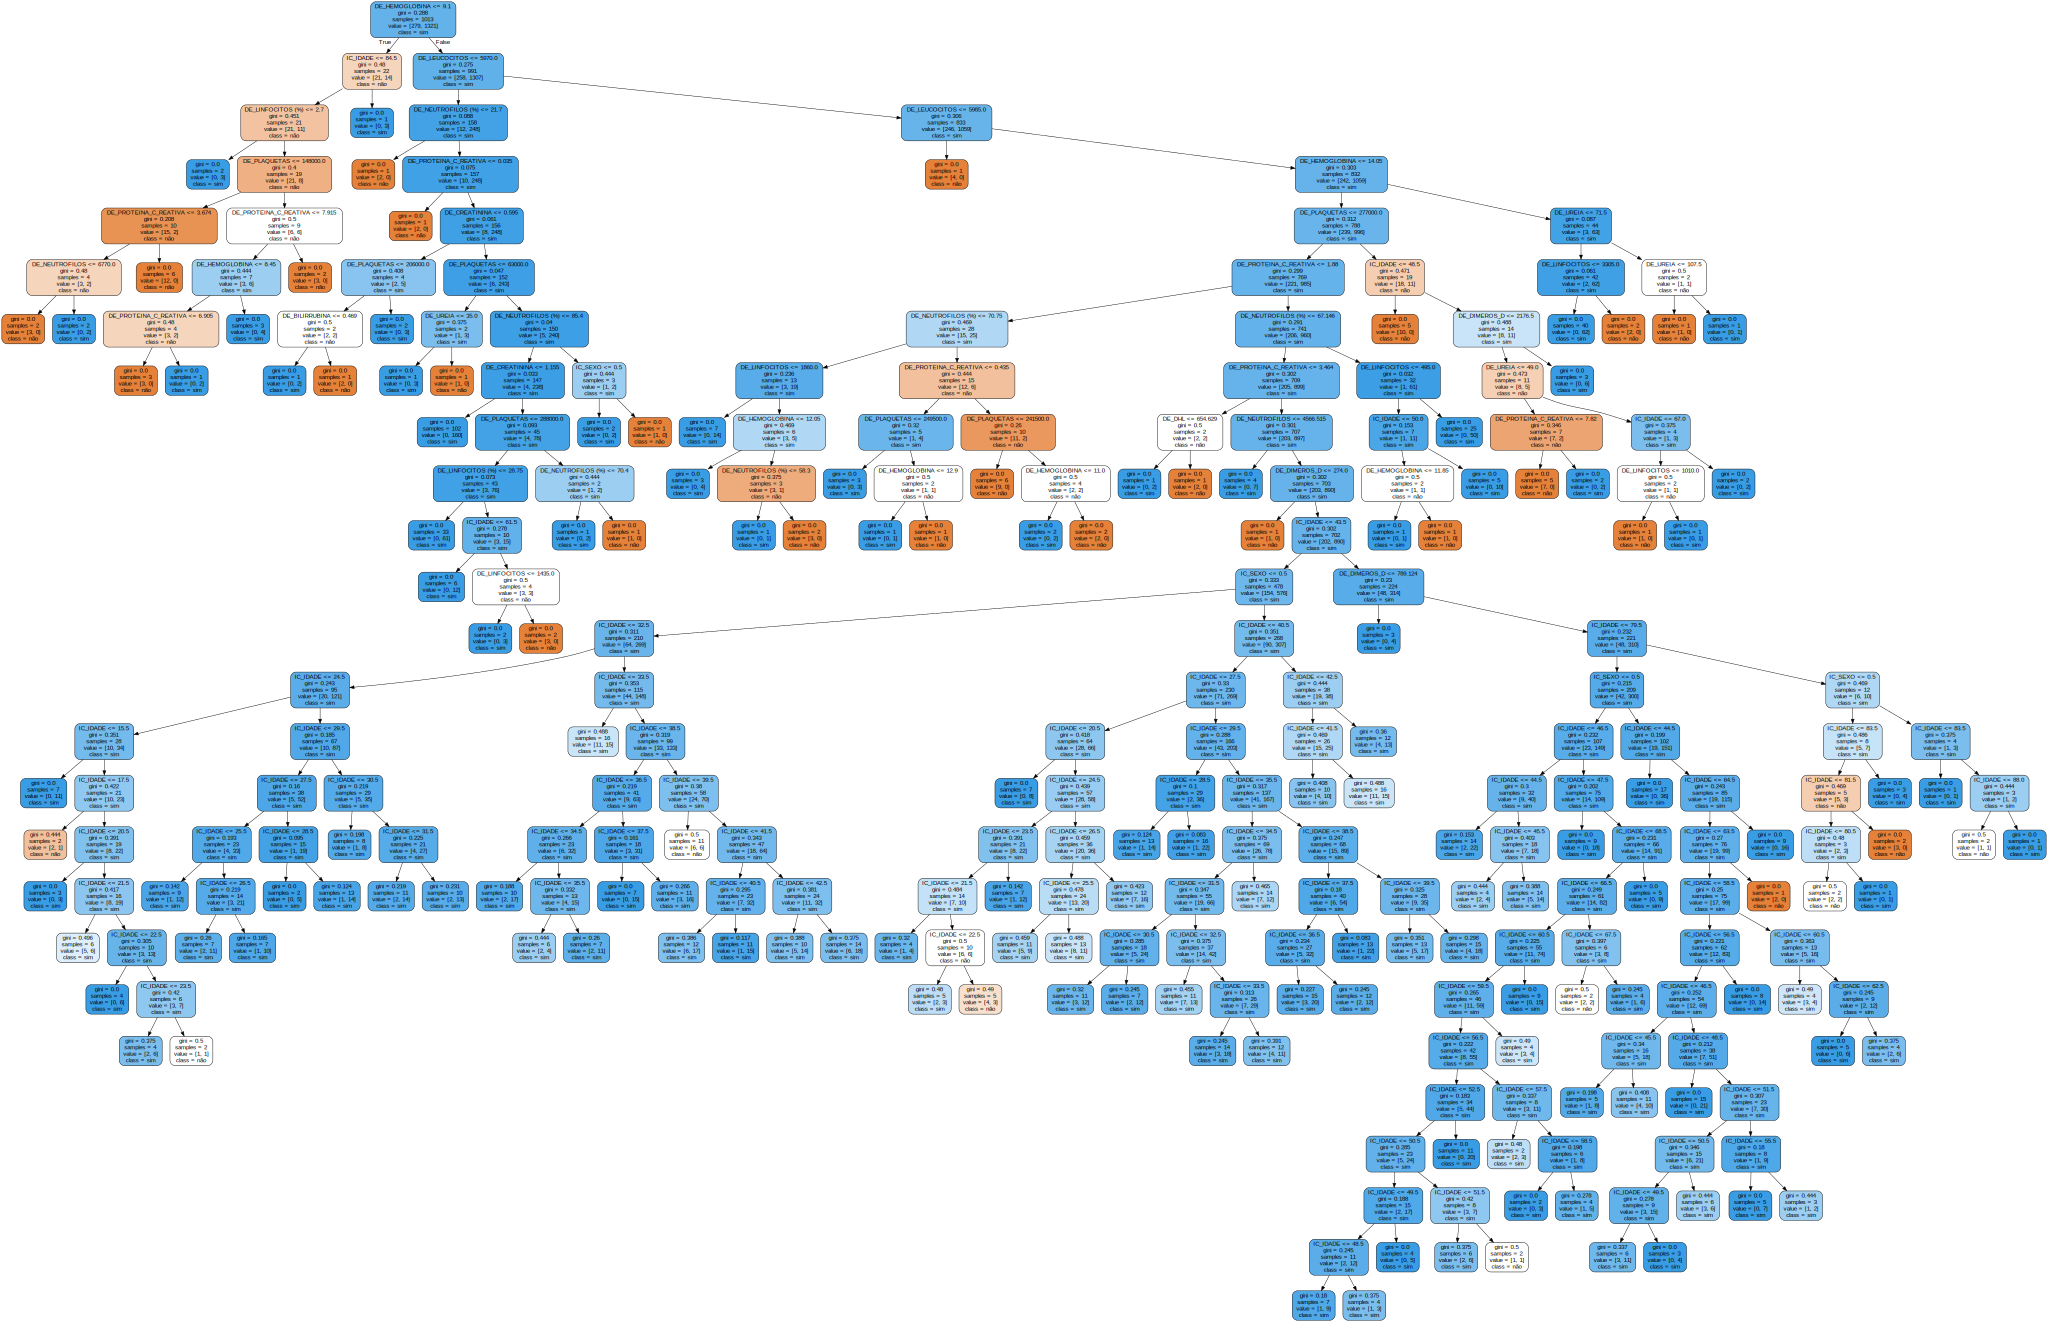

In [10]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

In [11]:
# em limitar a profundidade da árvore, temos árvores grandes, difíceis de visualizar. Para as próximas análises, 
# até a seção 3.4, vamos manter a profundidade máxima em 5.
#
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
modelo =  RandomForestClassifier(max_depth=5, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


A acurácia foi 82.58%


In [12]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

##### Interessante notar que a acurácia melhorou, diminuindo a profundidade máxima da árvore

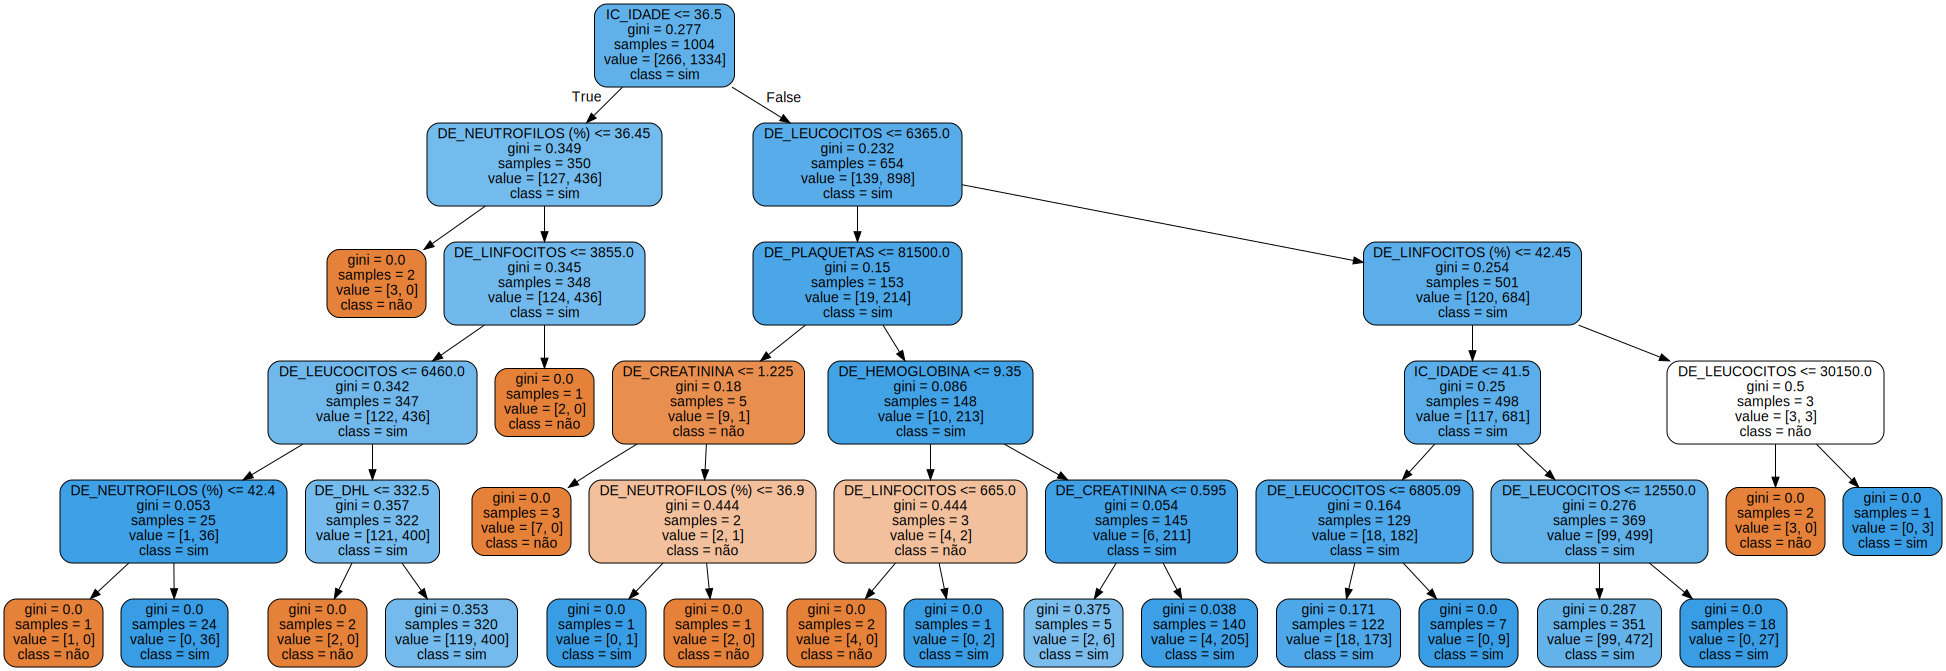

In [13]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

In [14]:
# Definição da função que calcula a importância das features. Esta função foi modificada em relação ao notebook original para
# retornar a figura do plot de importância das features, para que ela possa ser salva com o comando savefig do Matplotlib.
#
# Esta função foi definida no Projeto 1 da disciplina Cibernética e Aprendizagem de Máquinas
#
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Ordenar features de acordo com o valor de importância (ordem decrescente)
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalizando a importância das features, para que somadas cheguem ao valor de 1
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Plotar gráfico de barras horizontal com a importância das features
    fi_fig = plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Revertendo o índice, para garantir que a feature mais importante apareceça no topo do gráfico
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Definindo yticks e labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Título e eixos do gráfico
    plt.xlabel('Importância normalizada'); plt.title('Importância das features')
    plt.show()
    
    return df, fi_fig

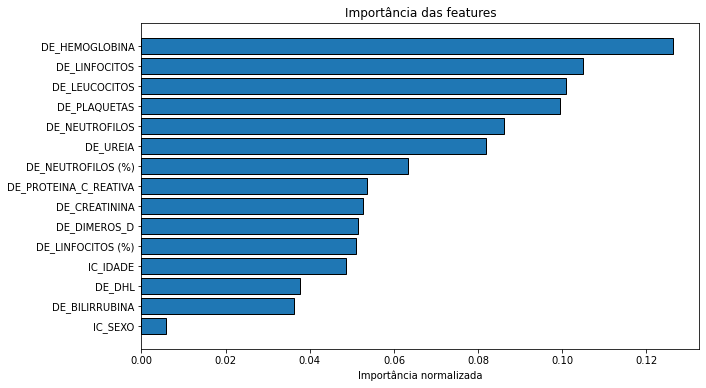

In [15]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [16]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted.png', dpi = 300, bbox_inches = 'tight', transparent=True)

####**3.2) Modificando o critério**

In [17]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Mantendo a profundidade máxima em 5, vamos mudar o critério de classificação de impureza
# na informação de coeficiente de Gini para entropia
modelo =  RandomForestClassifier(criterion='entropy', max_depth=5, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


A acurácia foi 82.58%


In [18]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

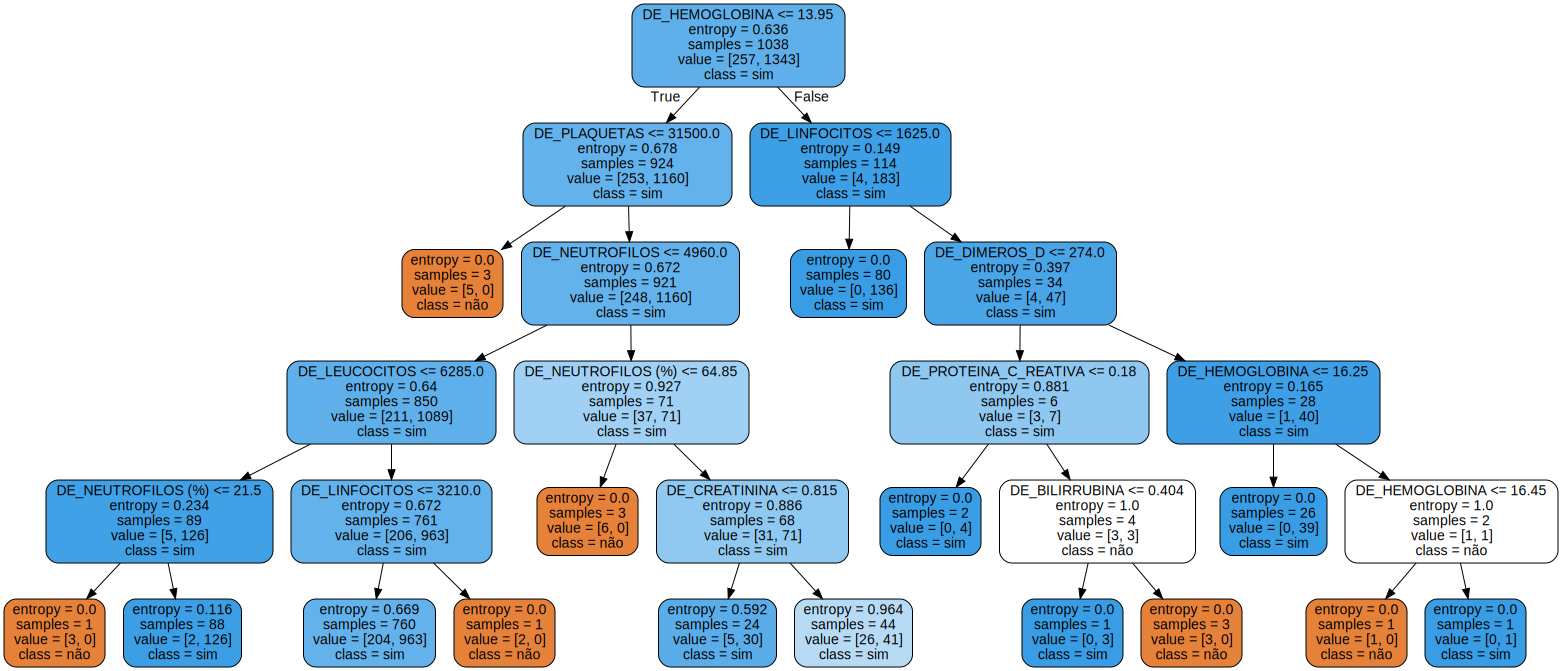

In [19]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

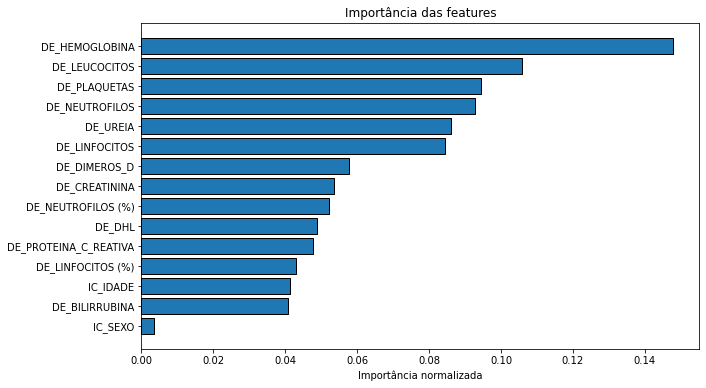

In [20]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [21]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_criterion.png', dpi = 300, bbox_inches = 'tight', transparent=True)

####**3.3) Modificando o número de estimadores**

#####**Diminuindo o número de estimadores**

In [22]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Vamos manter como critério o coeficiente de Gini, que obteve resultados ligeiramente melhores.
# Mantendo a profundidade máxima em 5, vamos mudar o número de estimadores utlizados para 50
modelo =  RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 82.77%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [23]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

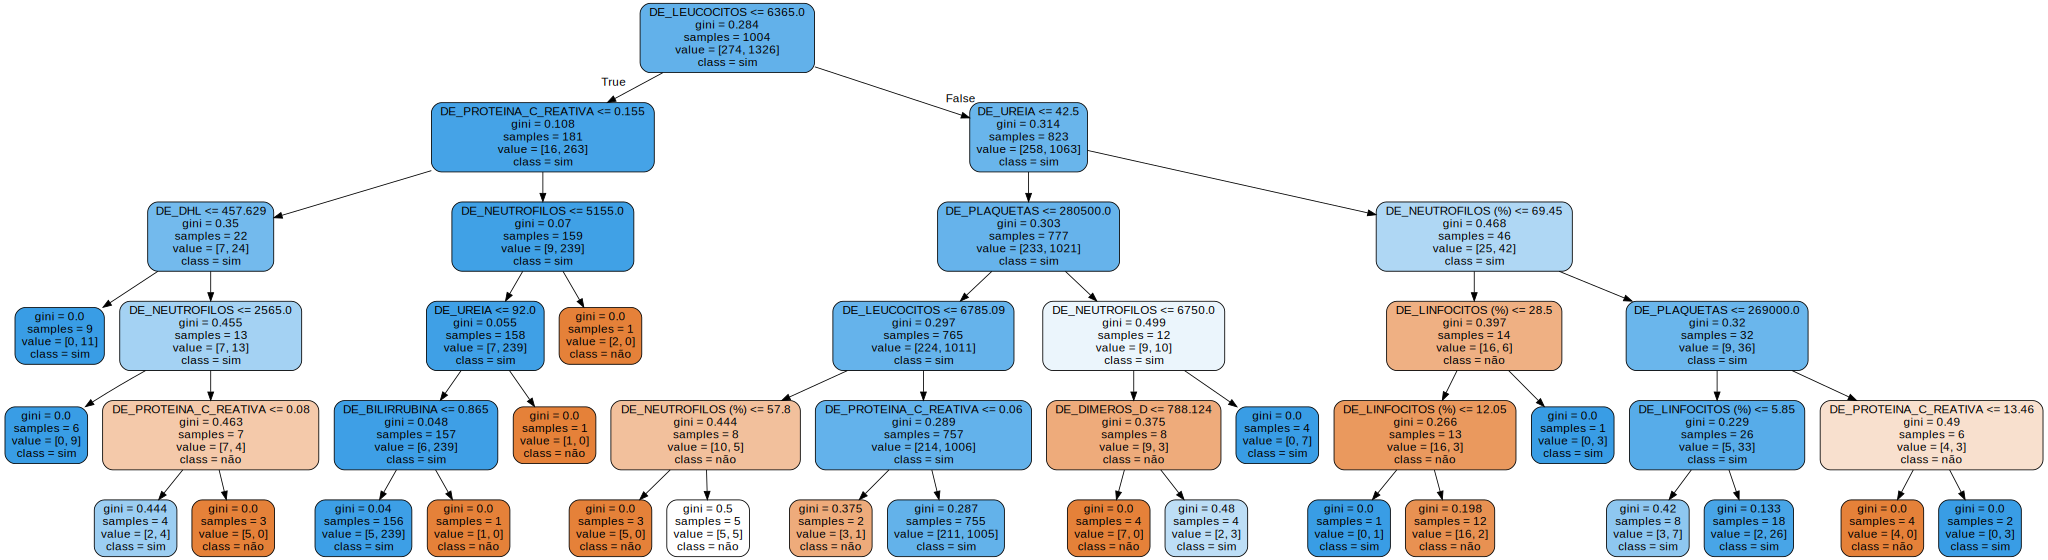

In [24]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

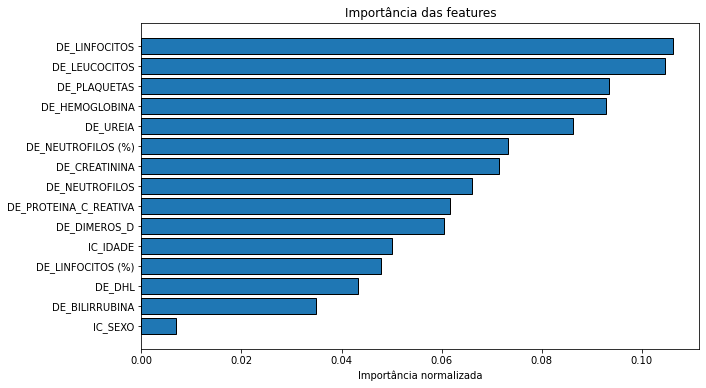

In [25]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [26]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_ne50.png', dpi = 300, bbox_inches = 'tight', transparent=True)

#####**Aumentando o número de estimadores**

In [27]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Vamos manter como critério o coeficiente de Gini, que obteve resultados ligeiramente melhores.
# Mantendo a profundidade máxima em 5, vamos mudar o número de estimadores utlizados para 50
modelo =  RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=5, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


A acurácia foi 82.77%


In [28]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

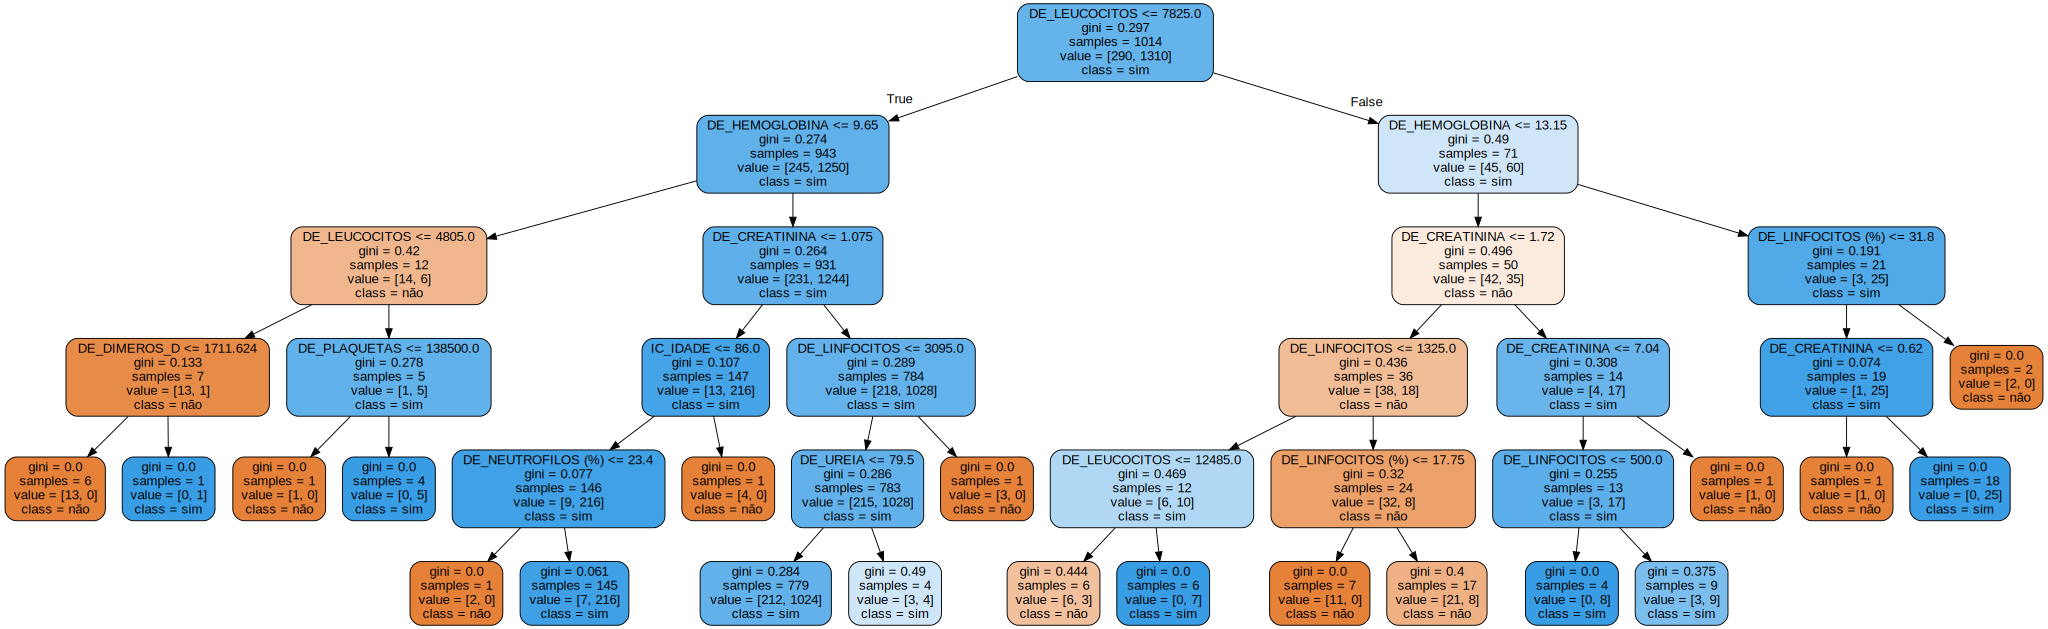

In [29]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

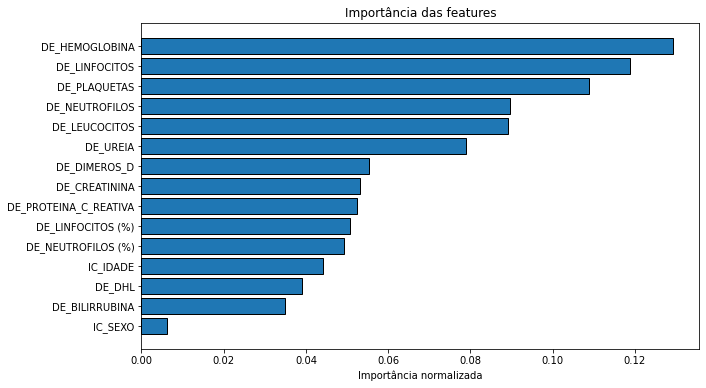

In [30]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [31]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_ne200.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [32]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Aumentar ou diminuir o número de estimadores não resultou em melhora de acurácia. Isso não quer
# dizer que o parâmetro não modifique os resultados: se usarmos 10 estimadores, a acurácia dimnui.
modelo =  RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 82.58%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


####**3.4) Modificando a profundidade máxima**

#####**Profundidade máxima = 2**

In [33]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Vamos agora variar a profundidade máxima da árvore, mantendo o número de estimadores igual a 50 (a princípio,
# um resultado melhor pois usamos menos estimadores). Vamos começar com a profundidade máxima igual a 2
modelo =  RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=2, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 82.96%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [34]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

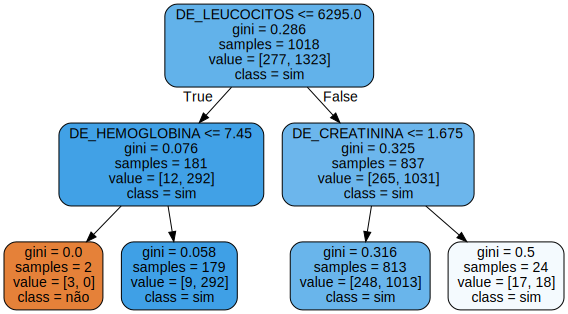

In [35]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

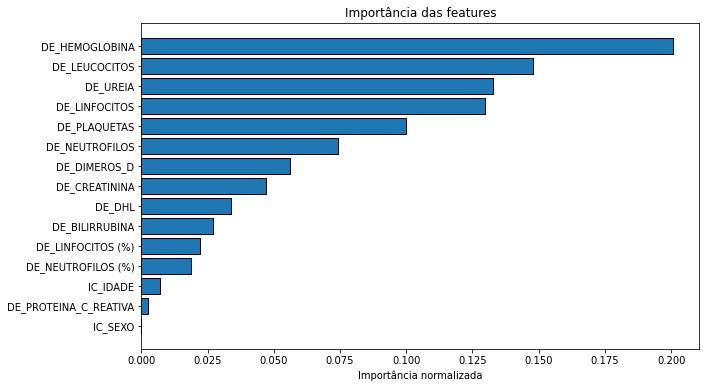

In [36]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [37]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_md2.png', dpi = 300, bbox_inches = 'tight', transparent=True)

#####**Profundidade máxima = 3**

In [38]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Analisando profundidade máxima igual a 3
modelo =  RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=3, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 82.77%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [39]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

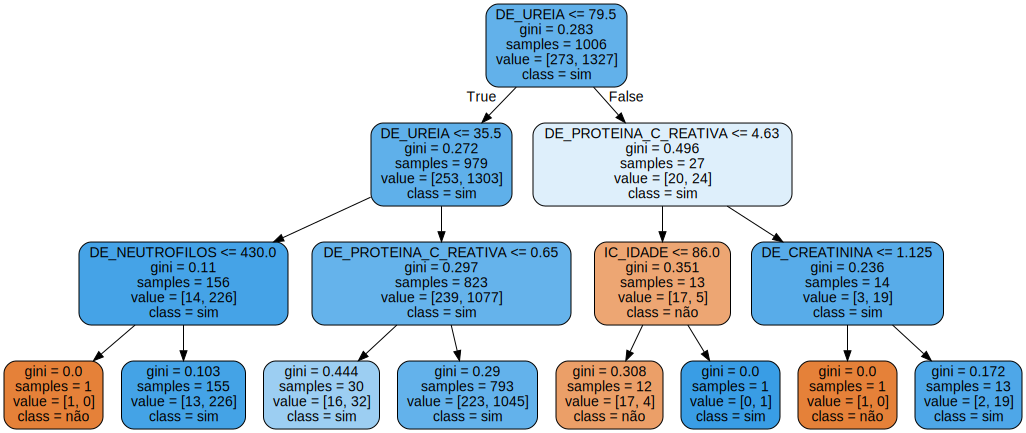

In [40]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

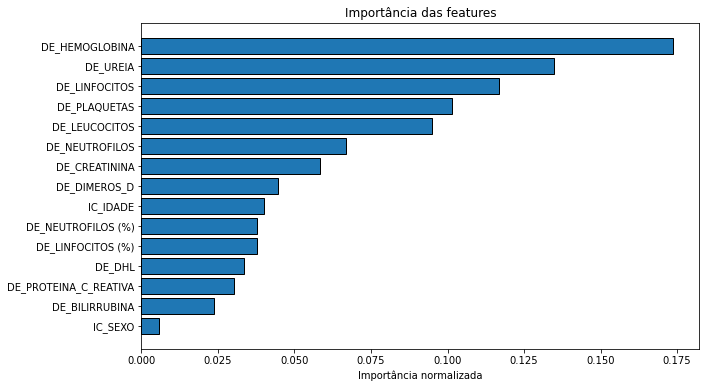

In [41]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [42]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_md3.png', dpi = 300, bbox_inches = 'tight', transparent=True)

#####**Profundidade máxima = 4**

In [43]:
# Importando o algoritmo RandomForestClassifier como modelo de aprendizagem de máquina
#
# Vamos agora variar a profundidade máxima da árvore, mantendo o número de estimadores igual a 50 (a princípio,
# um resultado melhor pois usamos menos estimadores). Vamos começar com a profundidade máxima igual a 2
modelo =  RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=4, random_state=random_state)

# Realizando o treinamento (fit) do modelo usando os dados de treino
modelo.fit(treino_x, treino_y)

# Extraindo features importantes e construindo um dataframe com elas
feature_importance_values = modelo.feature_importances_
feature_importances = pd.DataFrame({'feature': treino_x.columns, 'importance': feature_importance_values})

# Realizando previsões nos conjuntos de teste (predict) com base na etapa de treinamento
previsoes = modelo.predict(teste_x)

# Obtendo a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 82.58%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [44]:
# Vamos extrair uma única árvore de decisão da floresta aleatória para analisar a mesma
estimator = modelo.estimators_[42]

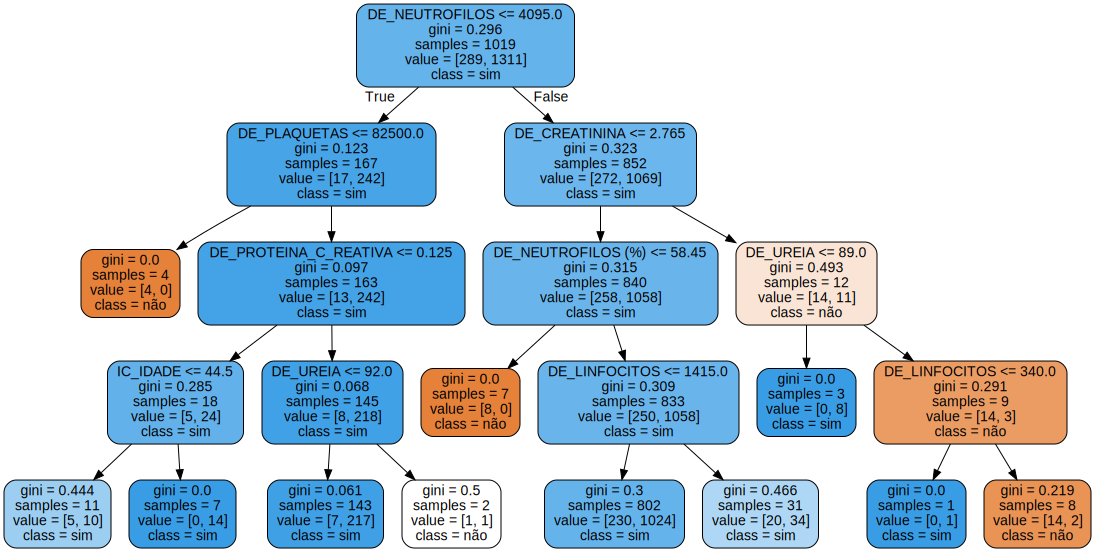

In [45]:
# Importando o graphviz
from sklearn.tree import export_graphviz
import graphviz

# Obtendo o nome das features através das colunas da variável x
features = x.columns 

# Exportando o gráfico da árvore de decisão com o graphviz, no formato .dot
dot_data = export_graphviz(estimator, out_file=None, # Utilizando um único estimador (árvore)
                           filled = True, rounded = True, # Quadros coloridos e bordas arredondadas
                           feature_names = features, # Colocando os nomes das variáveis no gráfico
                           class_names = ["não", "sim"]) # Colocando o nome das classes no gráfico

# Interpretando o arquivo .dot para exibir o gráfico da árvore de decisão                           
grafico = graphviz.Source(dot_data)
grafico

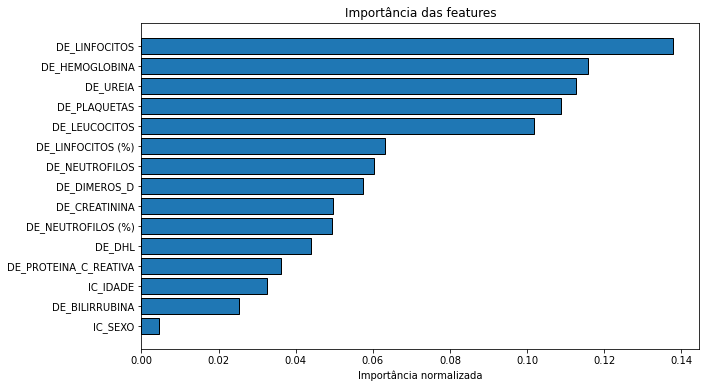

In [46]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [47]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('fi_sorted_md4.png', dpi = 300, bbox_inches = 'tight', transparent=True)